In [1]:

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime



In [2]:

def get_super(x):
    normal = "ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789+-=()"
    super_s = "ᴬᴮᶜᴰᴱᶠᴳᴴᴵᴶᴷᴸᴹᴺᴼᴾQᴿˢᵀᵁⱽᵂˣʸᶻᵃᵇᶜᵈᵉᶠᵍʰᶦʲᵏˡᵐⁿᵒᵖ۹ʳˢᵗᵘᵛʷˣʸᶻ⁰¹²³⁴⁵⁶⁷⁸⁹⁺⁻⁼⁽⁾"
    res = x.maketrans(''.join(normal), ''.join(super_s))
    return x.translate(res)

def get_sub(x):
    normal = "ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789+-=()"
    sub_s = "ₐ₈CDₑբGₕᵢⱼₖₗₘₙₒₚQᵣₛₜᵤᵥwₓᵧZₐ♭꜀ᑯₑբ₉ₕᵢⱼₖₗₘₙₒₚ૧ᵣₛₜᵤᵥwₓᵧ₂₀₁₂₃₄₅₆₇₈₉₊₋₌₍₎"
    res = x.maketrans(''.join(normal), ''.join(sub_s))
    return x.translate(res)

simulated_results = pd.read_csv("WQ_results.csv")
observed_NH4 = pd.read_csv("NH4.csv", parse_dates=['Date'])
observed_NO3 = pd.read_csv("NO3.csv", parse_dates=['Date'])
for i in range(0, len(simulated_results)):
    observed_NH4["NH4_Simulated"].values[i] = simulated_results["Grootdraai_Dam:NH4"].values[i]
    observed_NO3["NO3_Simulated"].values[i] = simulated_results["Grootdraai_Dam:NO3"].values[i]
    





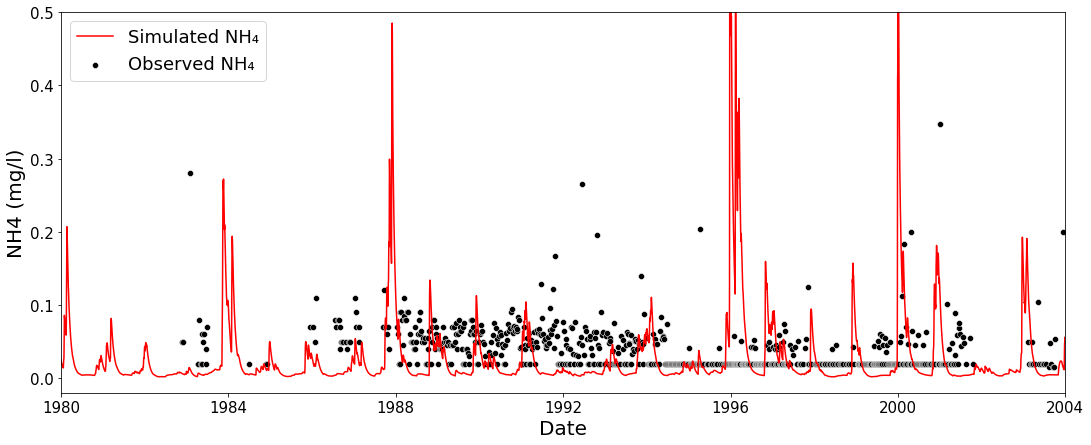

In [3]:
f = plt.figure()
f.set_figwidth(18)
f.set_figheight(7)
sns.scatterplot(data=observed_NH4, x='Date', y = "NH4_Observed", label = "Observed NH{}".format(get_sub('4')), color = "black")#print('H{}SO{}'.format(get_sub('2'),get_sub('4'))) 
sns.lineplot(data=observed_NH4, x='Date', y = "NH4_Simulated", label = "Simulated NH{}".format(get_sub('4')), color = "red")
start_date = datetime.strptime('01/01/1980 00:00','%d/%m/%Y %H:%M')
end_date = datetime.strptime('01/01/2004 00:00','%d/%m/%Y %H:%M')
plt.xlim([start_date, end_date])
plt.ylim([-0.02, 0.5])
plt.xlabel('Date', fontsize=20)
plt.ylabel('NH4 (mg/l)', fontsize=20)
plt.legend(fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.savefig('Grootdraai_NH4_calib.png', dpi = 300)
plt.show()

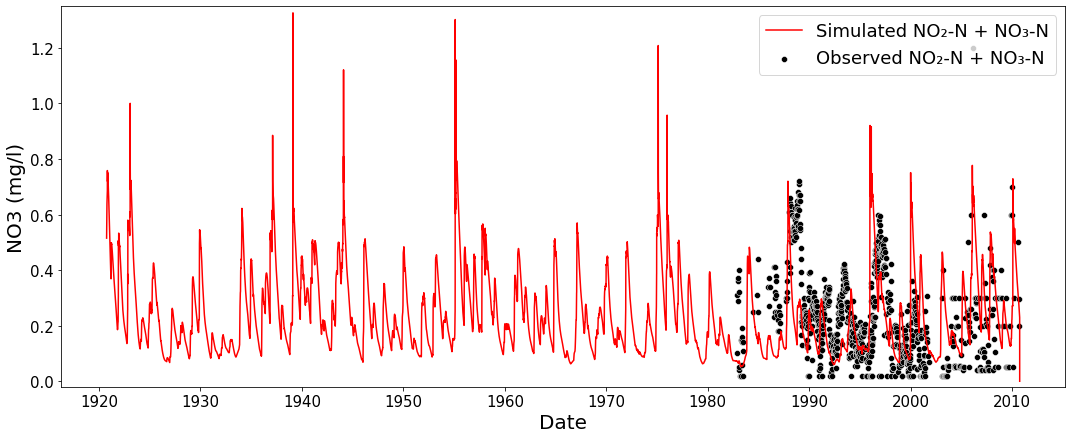

In [4]:
f = plt.figure()
f.set_figwidth(18)
f.set_figheight(7)
sns.scatterplot(data=observed_NO3, x='Date', y = "NO3_Observed", label = "Observed NO{}-N + NO{}-N".format(get_sub('2'), get_sub('3')), color = "black")
sns.lineplot(data=observed_NO3, x='Date', y = "NO3_Simulated", label = "Simulated NO{}-N + NO{}-N".format(get_sub('2'), get_sub('3')), color = "red")
start_date = datetime.strptime('01/01/1921 00:00','%d/%m/%Y %H:%M')
end_date = datetime.strptime('01/01/2010 00:00','%d/%m/%Y %H:%M')
#plt.xlim([start_date, end_date])
plt.ylim([-0.02, 1.35])
plt.xlabel('Date', fontsize=20)
plt.ylabel('NO3 (mg/l)', fontsize=20)
plt.legend(fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.savefig('Grootdraai_NO3_calib.png', dpi = 300)
plt.show()

In [5]:
simulated_FD = []

for i in range(0, len(observed_NO3)):
    if observed_NO3["NO3_Simulated"].values[i]> 0:
        simulated_FD.append({"percentile": 0.0001, "Value": observed_NO3["NO3_Simulated"].values[i]})
simulated_FD = pd.DataFrame(simulated_FD)

simulated_FD = simulated_FD.sort_values(by=['Value'], ascending=False)
for i in range(0, len(simulated_FD)):
    simulated_FD["percentile"].values[i] = float((i+1)/(len(simulated_FD) + 1) * 100)
    
    
    
observed_FD = []

for i in range(0, len(observed_NO3)):
    if observed_NO3["NO3_Observed"].values[i]> 0:
        observed_FD.append({"percentile": 0.0001, "Value": observed_NO3["NO3_Observed"].values[i]})
observed_FD = pd.DataFrame(observed_FD)

observed_FD = observed_FD.sort_values(by=['Value'], ascending=False)
for i in range(0, len(observed_FD)):
    observed_FD["percentile"].values[i] = float((i+1)/(len(observed_FD) + 1) * 100)



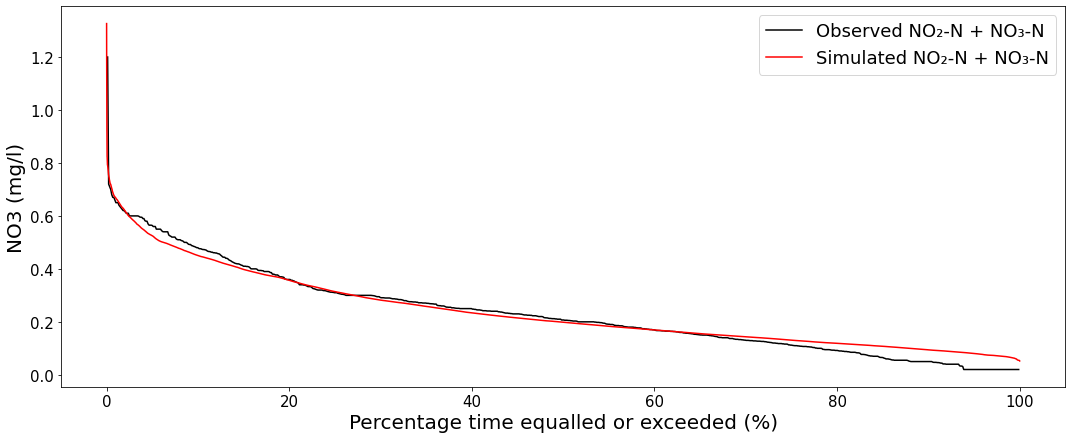

In [6]:
f = plt.figure()
f.set_figwidth(18)
f.set_figheight(7)
sns.lineplot(data = observed_FD, x='percentile', y = "Value", label = "Observed NO{}-N + NO{}-N".format(get_sub('2'), get_sub('3')), color = "black")
sns.lineplot(data=simulated_FD, x='percentile', y = "Value", label = "Simulated NO{}-N + NO{}-N".format(get_sub('2'), get_sub('3')), color = "red")
#plt.xlim([start_date, end_date])
#plt.ylim([-0.02, 2])
plt.xlabel('Percentage time equalled or exceeded (%)', fontsize=20)
plt.ylabel('NO3 (mg/l)', fontsize=20)
plt.legend(fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.savefig('Grootdraai_NO3_calib_FD.png', dpi = 300)
plt.show()

In [7]:
simulated_FD = []

for i in range(0, len(observed_NH4)):
    if observed_NH4["NH4_Simulated"].values[i]> 0:
        simulated_FD.append({"percentile": 0.0001, "Value": observed_NH4["NH4_Simulated"].values[i]})
simulated_FD = pd.DataFrame(simulated_FD)

simulated_FD = simulated_FD.sort_values(by=['Value'], ascending=False)
for i in range(0, len(simulated_FD)):
    simulated_FD["percentile"].values[i] = (i+1)/(len(simulated_FD) + 1) * 100
    
    
    
observed_FD = []

for i in range(0, len(observed_NH4)):
    if observed_NH4["NH4_Observed"].values[i]> 0:
        observed_FD.append({"percentile": 0.0001, "Value": observed_NH4["NH4_Observed"].values[i]})
observed_FD = pd.DataFrame(observed_FD)

observed_FD = observed_FD.sort_values(by=['Value'], ascending=False)
for i in range(0, len(observed_FD)):
    observed_FD["percentile"].values[i] = (i+1)/(len(observed_FD) + 1) * 100

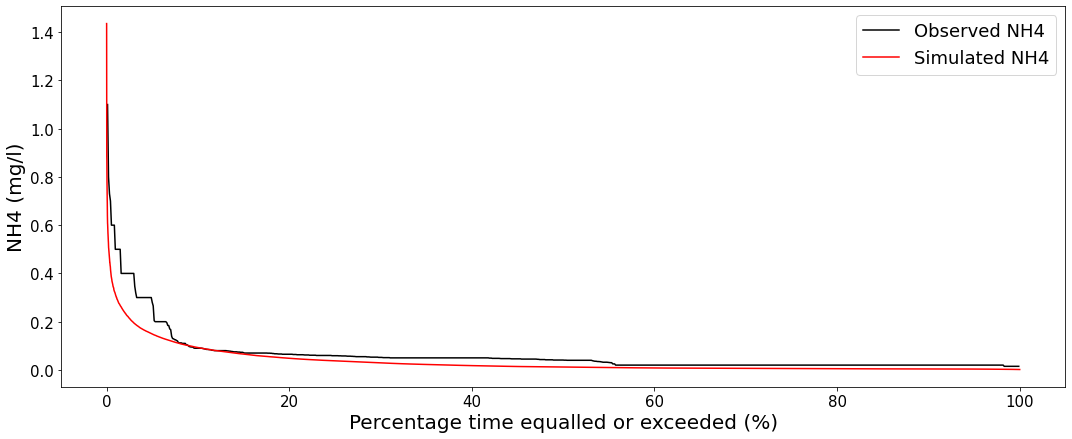

In [8]:
f = plt.figure()
f.set_figwidth(18)
f.set_figheight(7)
sns.lineplot(data = observed_FD, x='percentile', y = "Value", label = "Observed NH4", color = "black")
sns.lineplot(data=simulated_FD, x='percentile', y = "Value", label = "Simulated NH4", color = "red")
#plt.xlim([start_date, end_date])
#plt.ylim([-0.02, 2])
plt.xlabel('Percentage time equalled or exceeded (%)', fontsize=20)
plt.ylabel('NH4 (mg/l)', fontsize=20)
plt.legend(fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.savefig('Grootdraai_NH4_calib_FD.png', dpi = 300)
plt.show()